In [2]:
import djd.generalephys as ephys
import numpy as np
import os,sys,glob,copy,csv
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
lfp_path = '/Volumes/Public/Sev/IM15_2016-07-07_13-54-10_2/experiment1_100_0.dat'
rawdata = np.memmap(lfp_path, dtype=np.int16, mode='r',order='C')
channels = np.linspace(0,133,134).astype(int)
#site_positions = ephys.option234_positions[channels]
#lfpdata = np.reshape(rawdata,(384,-1),order='F')  * 0.195
#sample_rate = 2500.
#print 'recording is '+str(lfpdata.shape[1]/sample_rate)+' seconds'

In [74]:
def get_chunk(mm,start,end,channels,sampling_rate=30000):
    chunk = mm[start*sampling_rate*len(channels):end*sampling_rate*(len(channels))]
    return np.reshape(chunk,(len(channels),-1),order='F')  * 0.195

In [71]:
chunk = get_chunk(rawdata,1,2,channels)

30000
8040000
(4020000,)


In [41]:
channelmap = [
            113,
            17,
            16,
            111,
            15,
            112,
            14,
            109,
            13,
            110,
            12,
            107,
            11,
            108,
            10,
            105,
            9,
            106,
            8,
            103,
            7,
            104,
            6,
            101,
            5,
            102,
            4,
            99,
            3,
            100,
            2,
            97,
            1,
            98,
            64,
            95,
            63,
            96,
            62,
            93,
            61,
            94,
            60,
            91,
            59,
            92,
            58,
            89,
            57,
            90,
            56,
            88,
            55,
            87,
            54,
            86,
            53,
            85,
            52,
            84,
            51,
            83,
            50,
            82,
            49,
            81,
            80,
            47,
            79,
            48,
            78,
            45,
            77,
            46,
            76,
            44,
            75,
            43,
            74,
            42,
            73,
            41,
            72,
            40,
            71,
            39,
            70,
            38,
            69,
            37,
            68,
            36,
            67,
            35,
            66,
            34,
            65,
            33,
            128,
            32,
            127,
            31,
            126,
            30,
            125,
            29,
            124,
            28,
            123,
            27,
            122,
            26,
            121,
            25,
            120,
            24,
            119,
            23,
            118,
            22,
            117,
            21,
            116,
            20,
            115,
            19,
            114,
            18]

In [44]:
#make is zero-indexed
channelmap = np.array(channelmap)-1

In [47]:
#reverse it, so channel 0 is at the top of the probe, for plotting convenience
channelmap = channelmap[::-1]

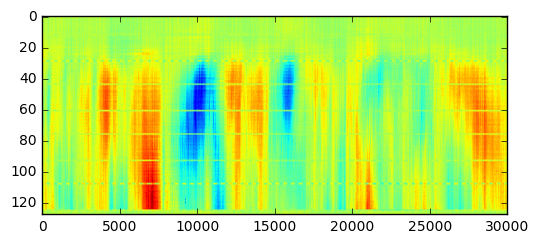

In [48]:
#show a chunk, of the whole probe, in image form
plt.imshow(chunk[channelmap,:])
plt.gca().set_aspect(100)

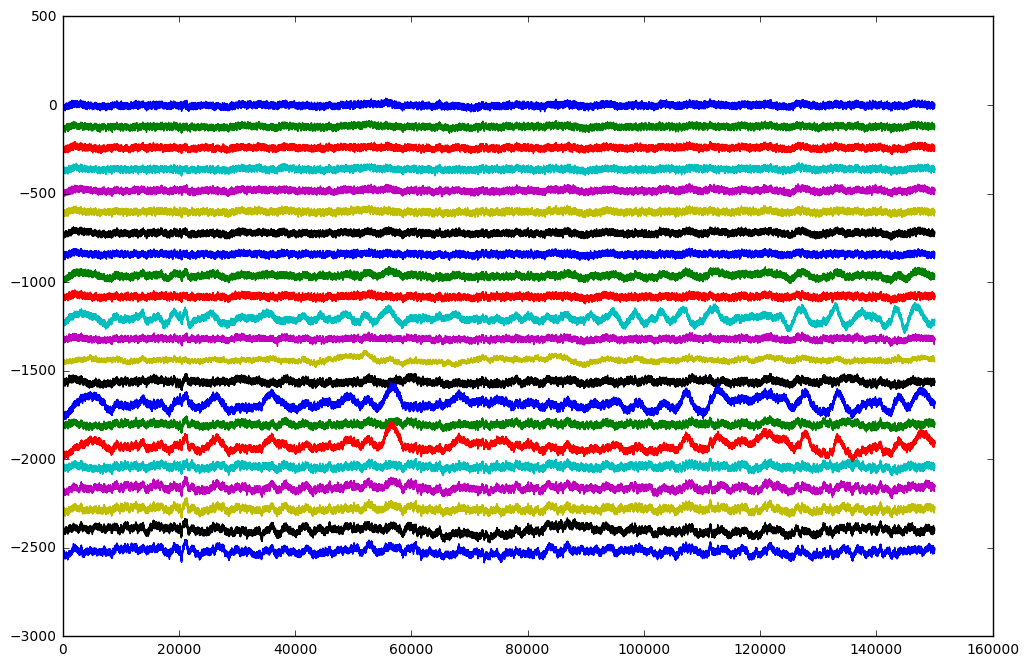

In [78]:
#show 
chunk = get_chunk(rawdata,10,15,channels)
plt.figure(figsize=(12,8))
for i,channel in enumerate(channelmap[:22]):
    plt.plot(chunk[channel,:]-i*120.)